In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn sentence-transformers topsispy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from topsispy import topsis
models = [
    "sentence-transformers/all-MiniLM-L6-v2",
    "bert-base-nli-mean-tokens",
    "roberta-large-nli-stsb-mean-tokens",
    "distilbert-base-nli-stsb-mean-tokens",
    "paraphrase-mpnet-base-v2"
]
sentences = [
    ("A cat is sleeping on the mat", "The feline is resting on the rug"),
    ("The sun is shining brightly", "It's a very sunny day"),
    ("I love programming", "Coding is my passion"),
]
results = []


In [3]:
for model_name in models:
    model = SentenceTransformer(model_name)

    cosine_similarities = []
    inference_times = []

    for sent1, sent2 in sentences:
        start_time = pd.Timestamp.now()
        emb1 = model.encode(sent1, convert_to_tensor=True)
        emb2 = model.encode(sent2, convert_to_tensor=True)
        end_time = pd.Timestamp.now()

        cosine_sim = util.pytorch_cos_sim(emb1, emb2).item()
        time_taken = (end_time - start_time).total_seconds()

        cosine_similarities.append(cosine_sim)
        inference_times.append(time_taken)
    avg_cosine_sim = np.mean(cosine_similarities)
    avg_time = np.mean(inference_times)
    results.append([model_name, avg_cosine_sim, avg_time])
df = pd.DataFrame(results, columns=["Model", "Cosine Similarity", "Inference Time"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:

data = df.iloc[:, 1:].values
weights = [0.7, 0.3]
impacts = [1, -1]



In [6]:
scores = topsis(data, weights, impacts)
topsis_scores = scores[1]

df["TOPSIS Score"] = topsis_scores
df = df.sort_values(by="TOPSIS Score", ascending=False).reset_index(drop=True)
df["Rank"] = df.index + 1

print(df)


                                    Model  Cosine Similarity  Inference Time  \
0    distilbert-base-nli-stsb-mean-tokens           0.680015        0.113758   
1                paraphrase-mpnet-base-v2           0.721008        0.266678   
2               bert-base-nli-mean-tokens           0.774270        0.330808   
3  sentence-transformers/all-MiniLM-L6-v2           0.651557        0.121144   
4      roberta-large-nli-stsb-mean-tokens           0.759885        1.425201   

   TOPSIS Score  Rank  
0      0.865088     1  
1      0.859008     2  
2      0.838437     3  
3      0.830225     4  
4      0.152100     5  


<ipython-input-7-b88b4586180e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOPSIS Score", y="Model", data=df, palette="viridis")


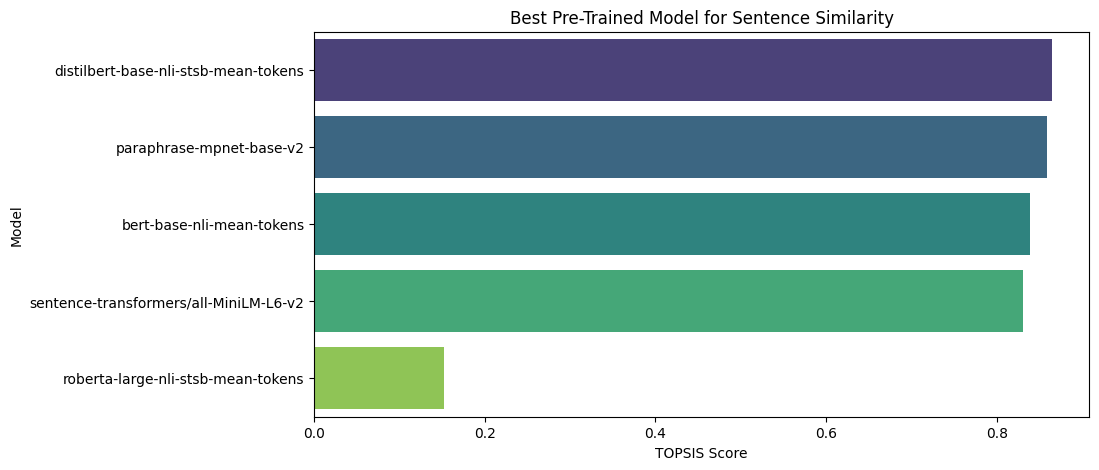

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x="TOPSIS Score", y="Model", data=df, palette="viridis")
plt.xlabel("TOPSIS Score")
plt.ylabel("Model")
plt.title("Best Pre-Trained Model for Sentence Similarity")
plt.show()


In [8]:
df.to_csv("sentence_similarity_topsis_results.csv", index=False)
print(df)


                                    Model  Cosine Similarity  Inference Time  \
0    distilbert-base-nli-stsb-mean-tokens           0.680015        0.113758   
1                paraphrase-mpnet-base-v2           0.721008        0.266678   
2               bert-base-nli-mean-tokens           0.774270        0.330808   
3  sentence-transformers/all-MiniLM-L6-v2           0.651557        0.121144   
4      roberta-large-nli-stsb-mean-tokens           0.759885        1.425201   

   TOPSIS Score  Rank  
0      0.865088     1  
1      0.859008     2  
2      0.838437     3  
3      0.830225     4  
4      0.152100     5  
